In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
brands = pd.read_csv("brands.csv") 
finance = pd.read_csv("finance.csv")
info = pd.read_csv("info.csv")
reviews = pd.read_csv("reviews.csv")

In [4]:
merged_df = info.merge(finance, on="product_id")
merged_df = merged_df.merge(reviews, on="product_id")
merged_df = merged_df.merge(brands, on="product_id")

merged_df.dropna(inplace=True)

In [5]:
price_labels = ['Budget', "Average", "Expensive", "Elite"]
merged_df['price_category'] = pd.qcut(merged_df['listing_price'], q=4, labels=price_labels)

In [6]:
adidas_vs_nike = merged_df.groupby(['brand', 'price_category'])['revenue'].agg(['count','mean']).round(2)
adidas_vs_nike.rename(columns={'count':'num_products', 'mean':'mean_revenue'}, inplace=True )
adidas_vs_nike.reset_index(inplace=True)

print(adidas_vs_nike)
print('\n')

    brand price_category  num_products  mean_revenue
0  Adidas         Budget           574       2015.68
1  Adidas        Average           655       3035.30
2  Adidas      Expensive           759       4621.56
3  Adidas          Elite           587       8302.78
4    Nike         Budget           357       1596.33
5    Nike        Average             8        675.59
6    Nike      Expensive            47        500.56
7    Nike          Elite           130       1367.45




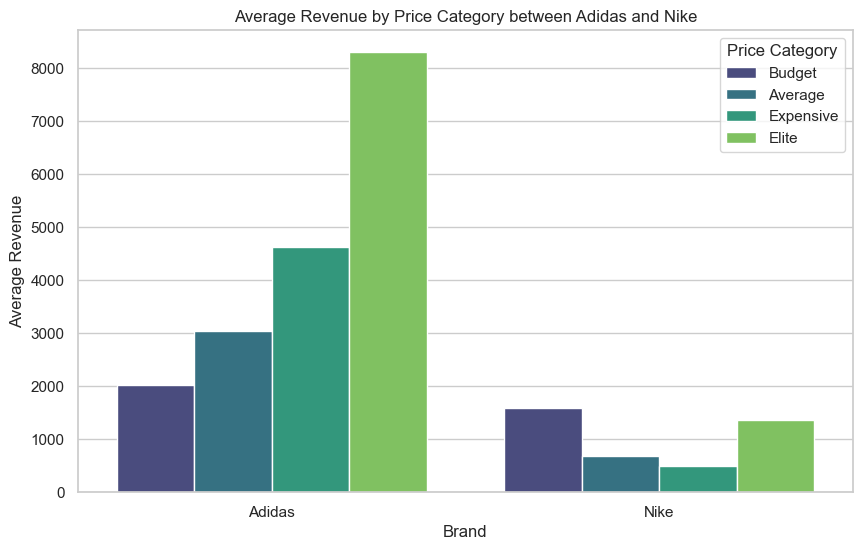

In [15]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='brand', y='mean_revenue', hue='price_category', data=adidas_vs_nike, palette='viridis')

plt.xlabel('Brand')
plt.ylabel('Average Revenue')
plt.title('Average Revenue by Price Category between Adidas and Nike')

plt.legend(title='Price Category', title_fontsize='12')

plt.show()

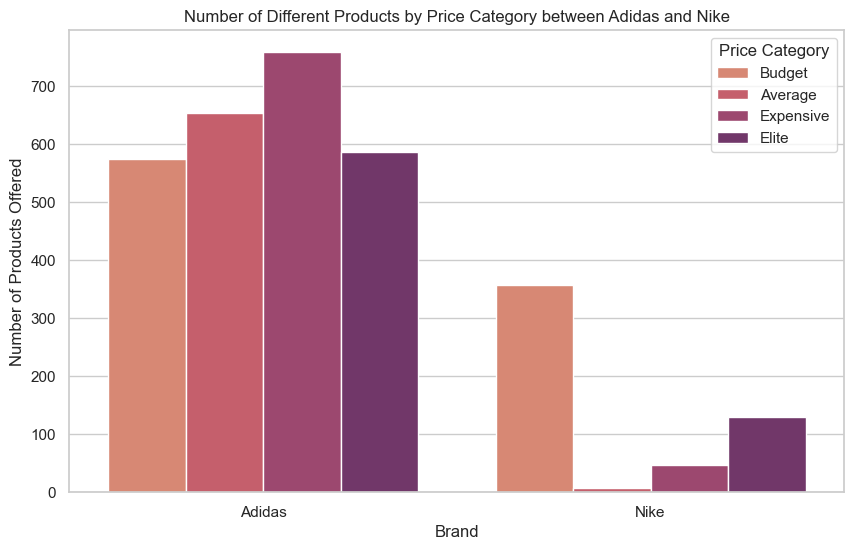

In [16]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='brand', y='num_products', hue='price_category', data=adidas_vs_nike, palette='flare')

plt.xlabel('Brand')
plt.ylabel('Number of Products Offered')
plt.title('Number of Different Products by Price Category between Adidas and Nike')

plt.legend(title='Price Category', title_fontsize='12')

plt.show()

In [17]:
print(f"Maximum description length is currently at {max(merged_df['description'].str.len())} characters.")
print('\n')

desc_length_bins = [0, 100, 200, 300, 400, 500, 600, 700]
desc_length_labels = ['100', '200', '300', '400', '500', '600', '700']            

merged_df['description_length'] = pd.cut(merged_df['description'].str.len(), bins=desc_length_bins, labels=desc_length_labels)

df_desc_length = merged_df.groupby('description_length', as_index=False).agg({'rating':'mean','reviews':'count'}).round(2)

df_desc_length.rename(columns={'rating':'mean_rating', 'reviews':'num_reviews'}, inplace=True)

df_desc_length.description_length = df_desc_length.description_length.astype(int) 

print(df_desc_length)

Maximum description length is currently at 687 characters.


   description_length  mean_rating  num_reviews
0                 100         2.26            7
1                 200         3.19          526
2                 300         3.28         1785
3                 400         3.29          651
4                 500         3.35          118
5                 600         3.12           15
6                 700         3.65           15


C:\Users\Baraa Ehab\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\categorical.py:528: RuntimeWarning: invalid value encountered in cast
  fill_value = lib.item_from_zerodim(np.array(np.nan).astype(dtype))


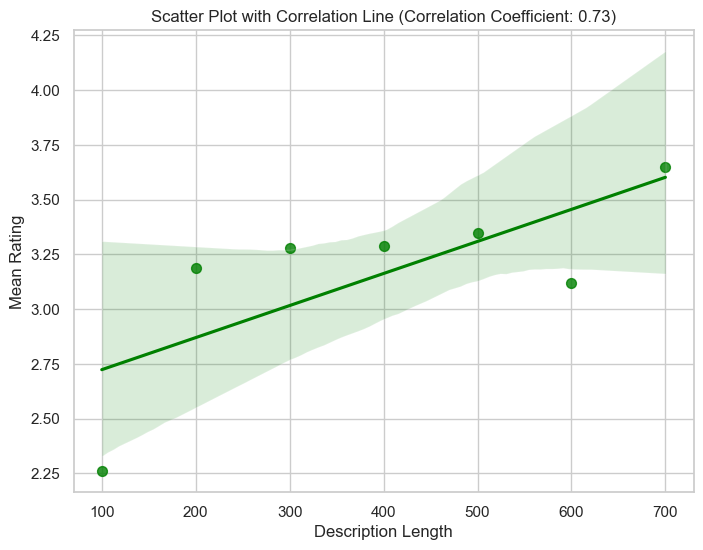

In [20]:
correlation_coefficient = np.corrcoef(df_desc_length.description_length, df_desc_length.mean_rating)[0, 1]

plt.figure(figsize=(8, 6))
sns.regplot(x='description_length', y='mean_rating', data=df_desc_length, color='green', scatter_kws={'s': 50})

plt.title(f'Scatter Plot with Correlation Line (Correlation Coefficient: {correlation_coefficient:.2f})')
plt.xlabel('Description Length')
plt.ylabel('Mean Rating')

plt.show()

In [21]:
footwear_keyword = "shoe*|trainer*|foot*"

shoes_df = merged_df[merged_df['description'].str.contains(footwear_keyword)]
footwear_filter = list(shoes_df['product_id'])

clothing_df = merged_df[~merged_df.isin(footwear_filter)] #It still returns all, but non-matching ones get null
clothing_df.dropna(inplace=True)


final_df_footwear_vs_clothing = pd.DataFrame({'num_clothing_products': len(clothing_df),
                             'median_clothing_revenue': clothing_df['revenue'].median(),
                             'num_footwear_products': len(shoes_df),
                             'median_footwear_revenue': shoes_df['revenue'].median()},
                            index=[0])

print(final_df_footwear_vs_clothing)

   num_clothing_products  median_clothing_revenue  num_footwear_products  \
0                    478                   625.07                   2639   

   median_footwear_revenue  
0                   3073.3  


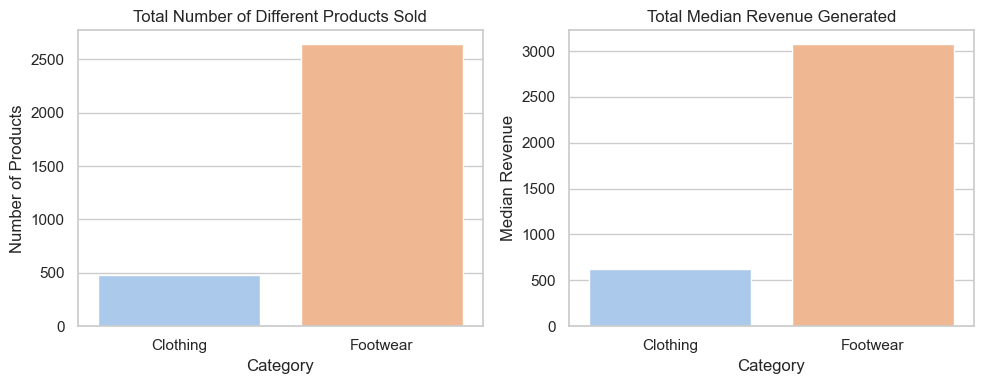

In [22]:
copy_of_final_data = {
    'Category': ['Clothing', 'Footwear'],
    'Num_Products': [478, 2639],
    'Median_Revenue': [625.07, 3073.3]
}

df = pd.DataFrame(copy_of_final_data)


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))


sns.barplot(x='Category', y='Num_Products', data=df, ax=axes[0], palette='pastel')
axes[0].set_title('Total Number of Different Products Sold')
axes[0].set_ylabel('Number of Products')


sns.barplot(x='Category', y='Median_Revenue', data=df, ax=axes[1], palette='pastel')
axes[1].set_title('Total Median Revenue Generated')
axes[1].set_ylabel('Median Revenue')


plt.tight_layout()


plt.show()